In [ ]:
#IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [ ]:
#LOADING DATA FROM CSV FILE
import requests
import pandas as pd
import io

# Corrected URL to point to the raw CSV file
url = "https://raw.githubusercontent.com/satyanarayanan102/OIBSIP/main/EDA%20Retail%20Sales/retails.csv"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = pd.read_csv(io.StringIO(response.text))
    print(data.head()) # Print first few rows to verify
else:
    print("Failed to download the file. Check the URL.")

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24-11-2023     CUST001    Male   34           Beauty   
1               2  27-02-2023     CUST002  Female   26         Clothing   
2               3  13-01-2023     CUST003    Male   50      Electronics   
3               4  21-05-2023     CUST004    Male   37         Clothing   
4               5  06-05-2023     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
#showing the rows
data.head(1001)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16-05-2023,CUST996,Male,62,Clothing,1,50,50
996,997,17-11-2023,CUST997,Male,52,Beauty,3,30,90
997,998,29-10-2023,CUST998,Female,23,Beauty,4,25,100
998,999,05-12-2023,CUST999,Female,36,Electronics,3,50,150


In [ ]:
#gives (num rows, num col)
data.shape

(1000, 9)

In [ ]:
data.dtypes


Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [ ]:
data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
pd.isnull(data).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
data[["Date"]] = data[["Date"]].apply(pd.to_datetime)
data["Quantity"] = data["Quantity"].astype(float).astype('Int64')
data.dtypes

<ipython-input-10-759fd6069785>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[["Date"]] = data[["Date"]].apply(pd.to_datetime)


Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     Int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [ ]:
data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [ ]:
data.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.0,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.0,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.0,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.0,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.0,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.0,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [ ]:
#DATA_CLEANING
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
#null values are set to 1
data['Quantity'].fillna(1, inplace=True)

In [ ]:
data['Price per Unit'].fillna(data.groupby('Product Category')['Price per Unit'].transform('mean'), inplace=True)
data['Price per Unit'].fillna(data['Price per Unit'].mean(), inplace=True)

In [ ]:
data = data[data['Product Category'].notna()]

In [ ]:
data.loc[data['Date'] > data['Date'], 'Date'] = 'Past Due'

In [ ]:
print(data['Total Amount'].mean(), data['Total Amount'].std(), data['Total Amount'].mean() - 3 * data['Total Amount'].std(), data['Total Amount'].mean() + 3 * data['Total Amount'].std())
data = data[data['Total Amount'] < (data['Total Amount'].mean() + (3 * data['Total Amount'].std()))]
data = data[data['Total Amount'] > (data['Total Amount'].mean() - (3 * data['Total Amount'].std()))]

456.0 559.997631555123 -1223.992894665369 2135.992894665369


In [ ]:
data.groupby(['Product Category']).agg({'Quantity':np.sum}).reset_index()

,Product Category,Quantity
0,Beauty,771
1,Clothing,894
2,Electronics,849


<Axes: xlabel='Product Category', ylabel='Price per Unit'>

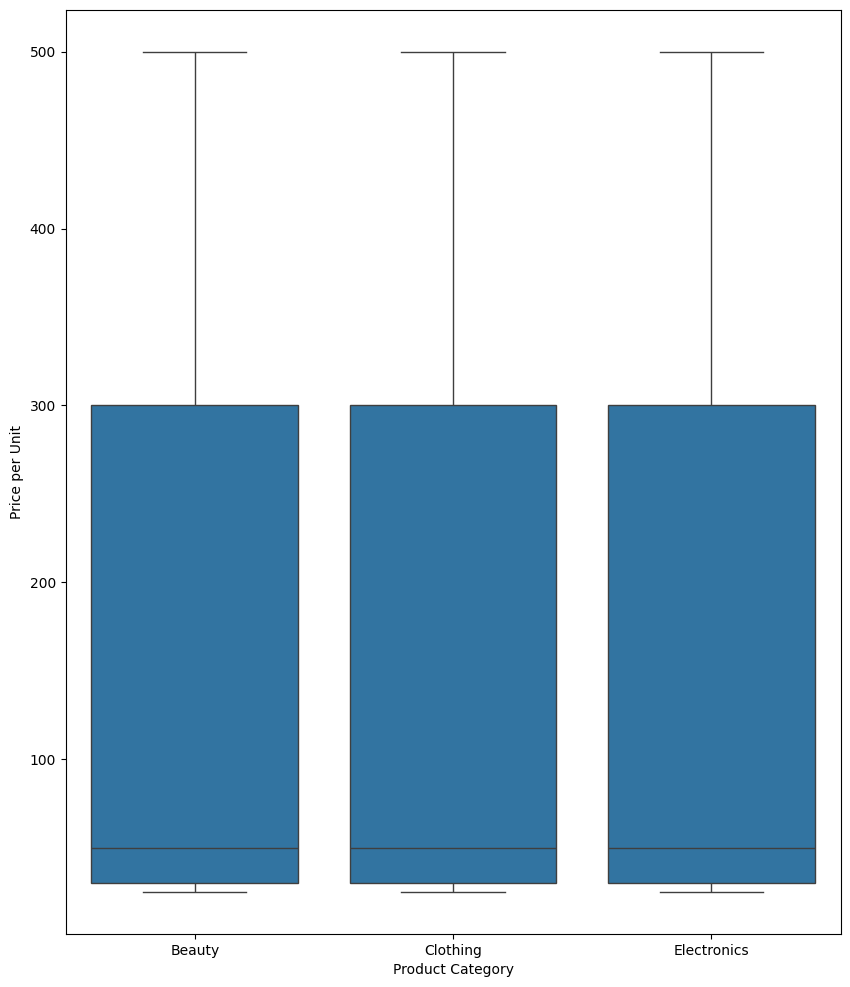

In [ ]:
plt.figure(figsize =(10, 12))
sns.boxplot(y= data['Price per Unit'], x = data['Product Category'])

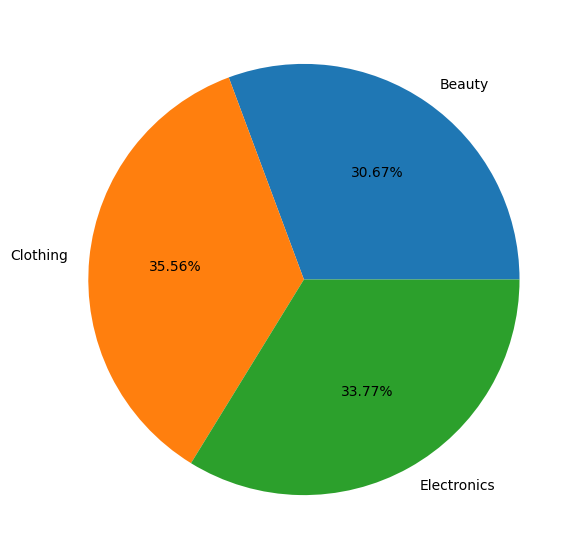

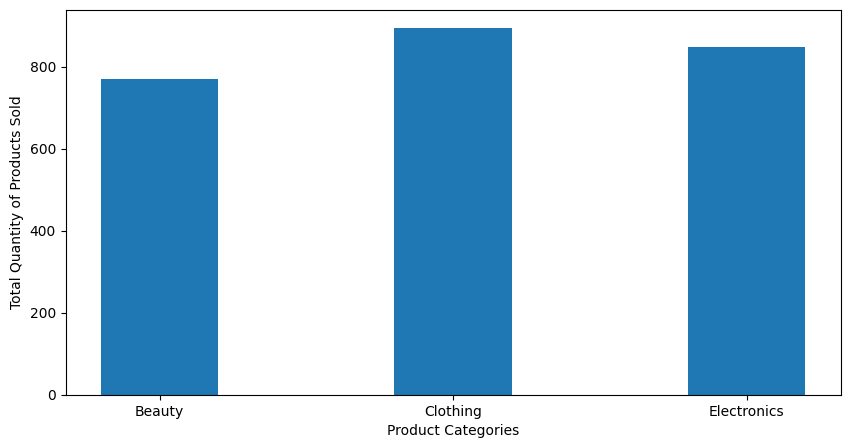

In [ ]:
df = data.groupby(['Product Category']).agg({'Quantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7))
plt.pie(df.Quantity, labels = df['Product Category'],autopct='%1.2f%%')
# show plot
plt.show()

fig2 = plt.figure(figsize = (10, 5))
plt.bar(df['Product Category'], df.Quantity, width = 0.4)
plt.xlabel("Product Categories")
plt.ylabel("Total Quantity of Products Sold")
# show plot
plt.show()

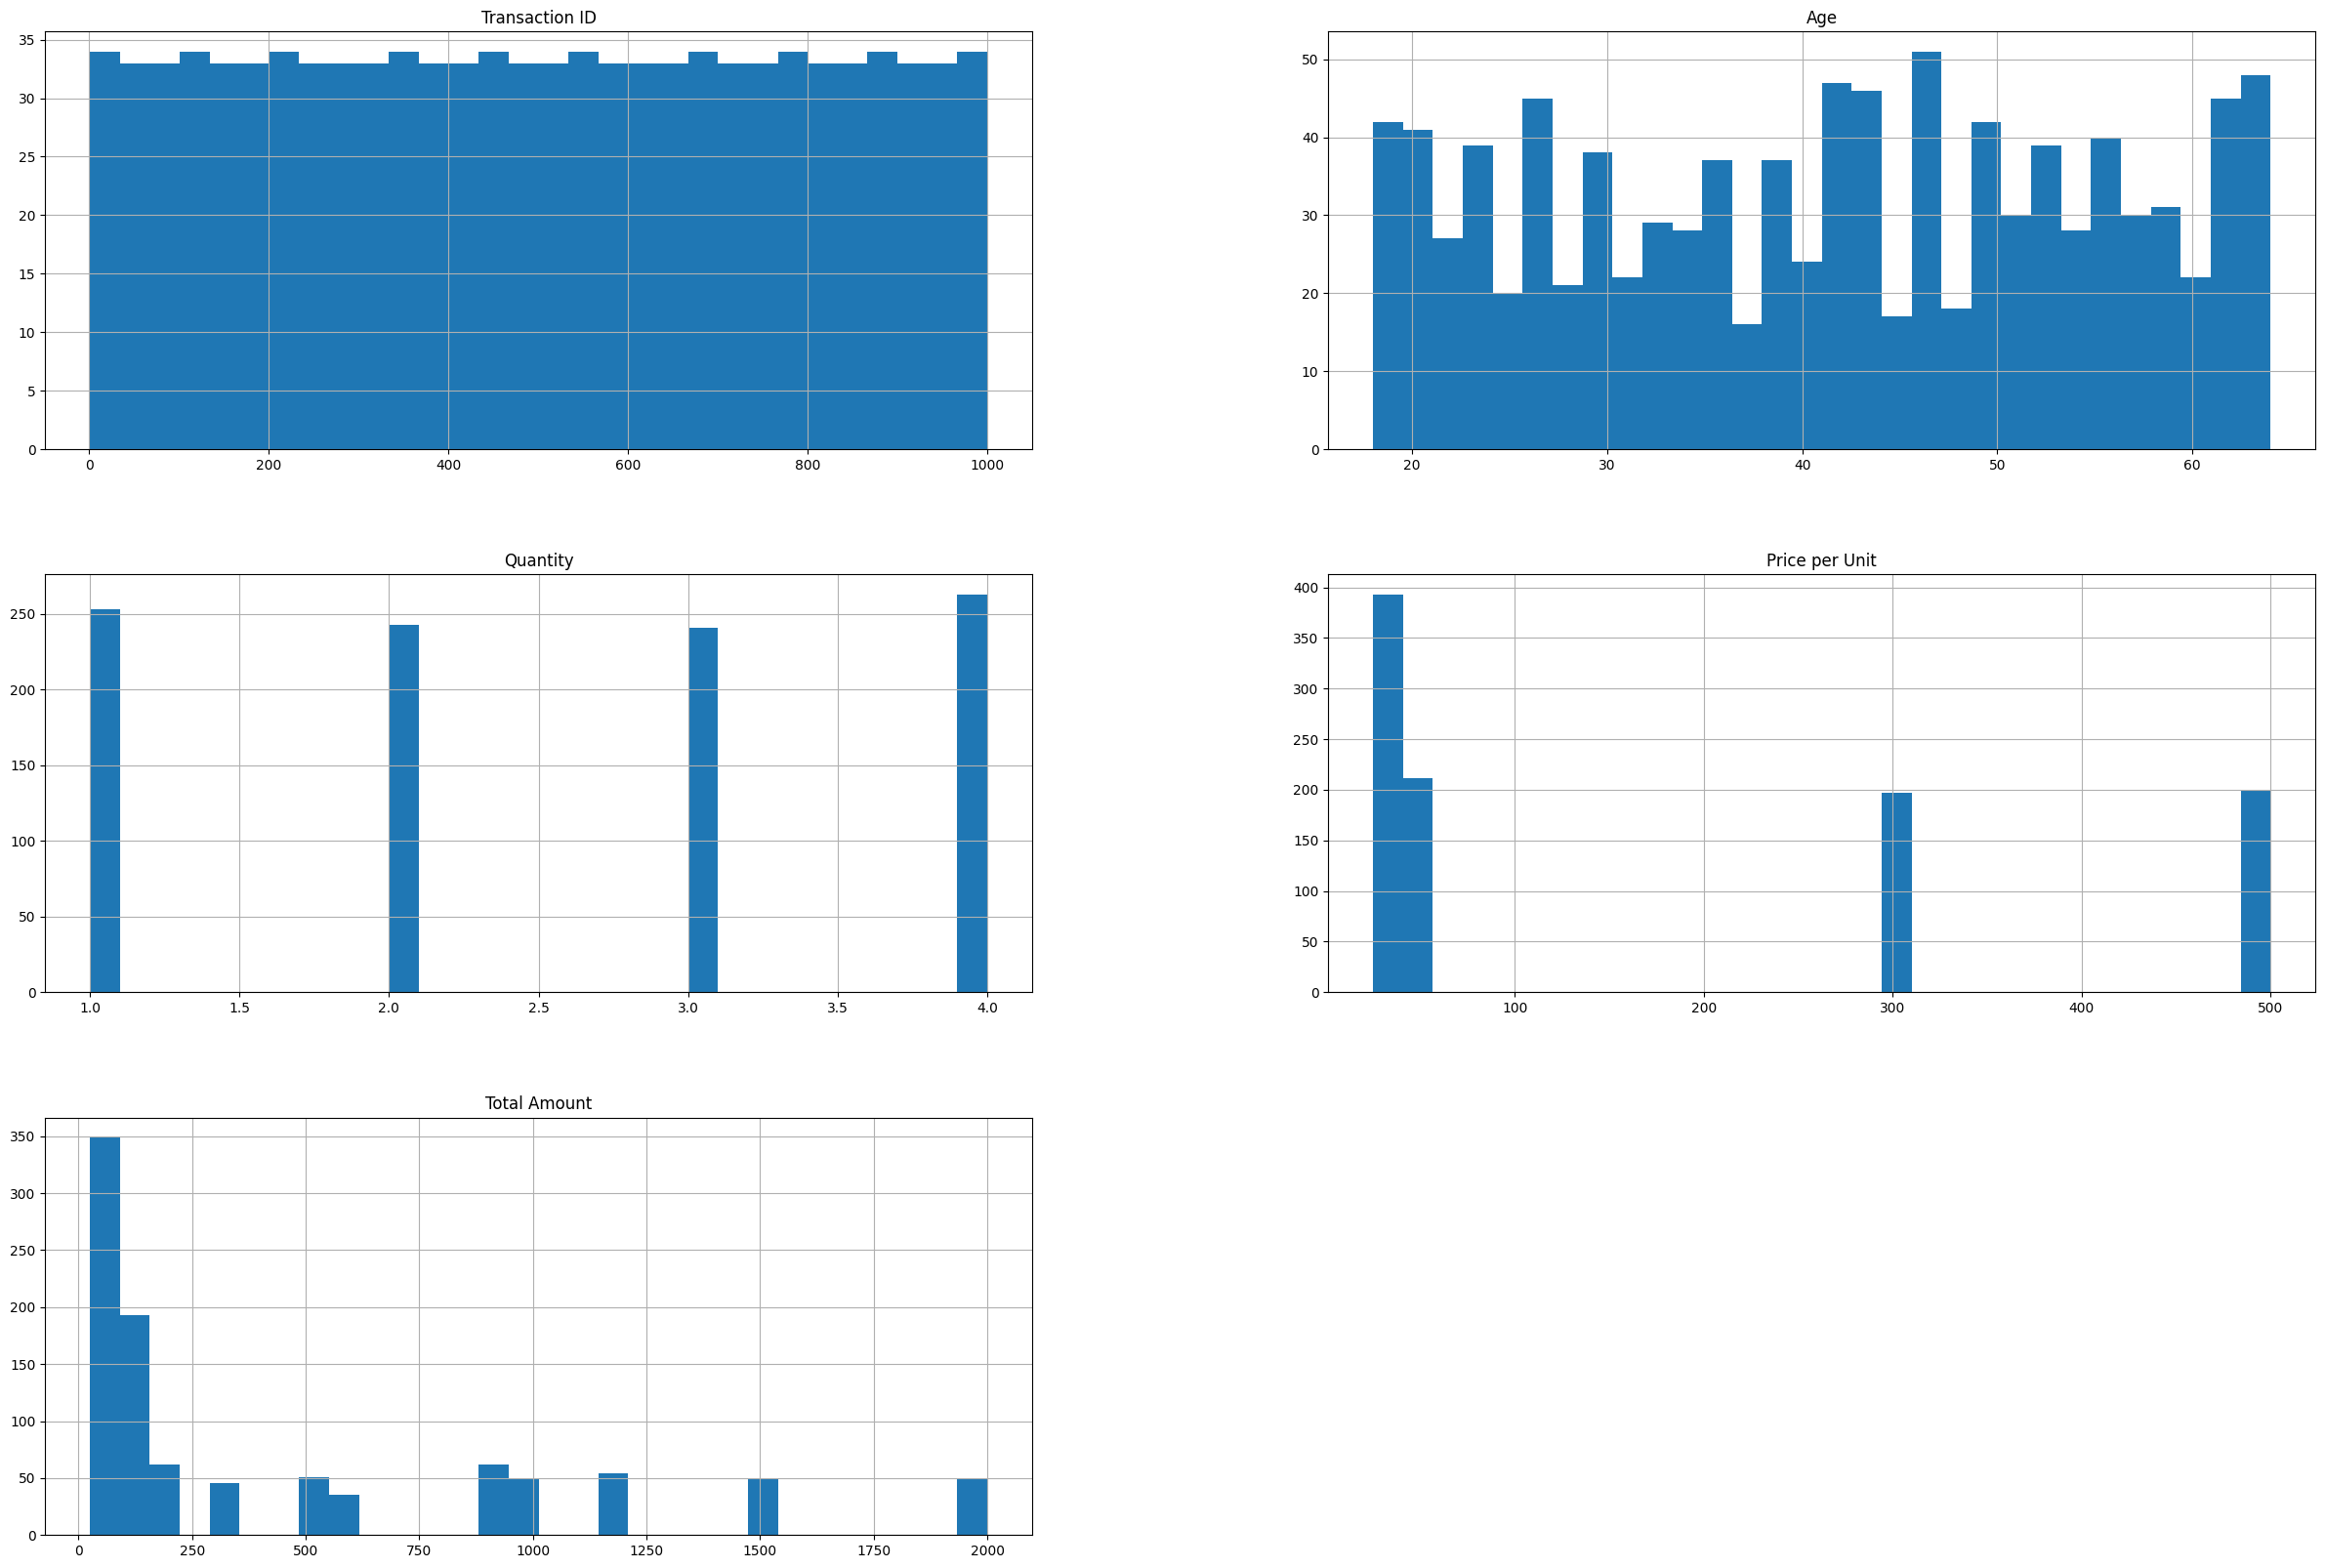

In [ ]:
#Plot histogram of all numeric attrubites to see their distribution
# Plot the histograms of each
data.hist(bins=30, figsize=(30,20))
plt.show()

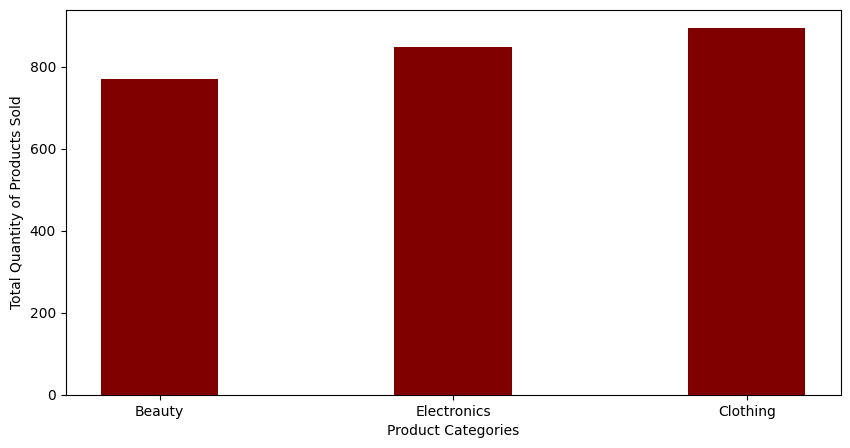

In [ ]:
# Product Category
df=df.sort_values('Quantity')
fig2 = plt.figure(figsize = (10, 5))
plt.bar(df['Product Category'], df.Quantity, color ='maroon', width = 0.4)
plt.xlabel("Product Categories")
plt.ylabel("Total Quantity of Products Sold")
# show plot
plt.show()

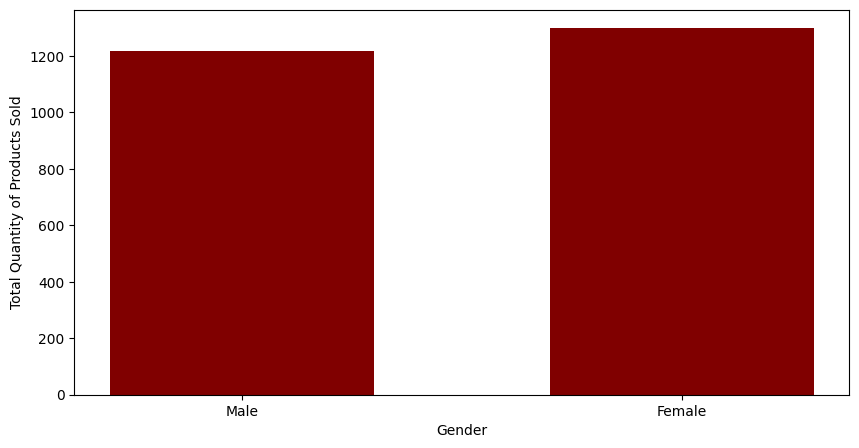

In [ ]:
#Region
df = data.groupby(['Gender']).agg({'Quantity':np.sum}).reset_index().sort_values('Quantity')
fig = plt.figure(figsize = (10, 5))
plt.bar(df.Gender, df.Quantity, color ='maroon', width = 0.6)
plt.xlabel("Gender")
plt.ylabel("Total Quantity of Products Sold")
# show plot
plt.show()

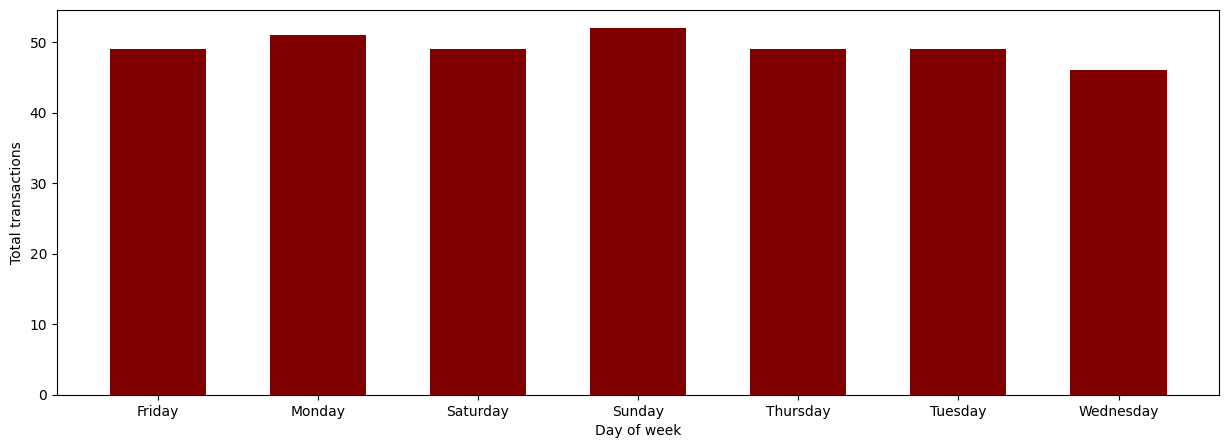

In [ ]:
#Plot number of transactions on each day of week.
df = data.groupby(['Date']).size()
new_df = df.to_frame(name = 'ize').reset_index()
new_df['NumberofTransactions']=1
new_df['day_of_week'] = new_df['Date'].dt.day_name()

dataTransactions = new_df.groupby('day_of_week')['NumberofTransactions'].agg('sum').reset_index()
dataTransactions = dataTransactions.loc[[0,1,2,3,4,5,6], :]  # Sunday to Saturday

# #plotting bar chart
fig = plt.figure(figsize = (15, 5))
plt.bar(dataTransactions.day_of_week, dataTransactions.NumberofTransactions, color ='maroon', width = 0.6)
plt.xlabel("Day of week")
plt.ylabel("Total transactions")
plt.show()

In [ ]:
df.head(20)
df = data.groupby(['Transaction ID'], sort=False).size().reset_index(name='Count')
df['Count'].describe()

count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64

In [ ]:
data['NormalizedPrice'] = (data['Price per Unit'] - data['Price per Unit'].mean()) / data['Price per Unit'].std()
data.head(1000)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,NormalizedPrice
0,1,2023-11-24 00:00:00,CUST001,Male,34,Beauty,3,50,150,-0.68478
1,2,2023-02-27 00:00:00,CUST002,Female,26,Clothing,2,500,1000,1.68762
2,3,2023-01-13 00:00:00,CUST003,Male,50,Electronics,1,30,30,-0.79022
3,4,2023-05-21 00:00:00,CUST004,Male,37,Clothing,1,500,500,1.68762
4,5,2023-05-06 00:00:00,CUST005,Male,30,Beauty,2,50,100,-0.68478
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16 00:00:00,CUST996,Male,62,Clothing,1,50,50,-0.68478
996,997,2023-11-17 00:00:00,CUST997,Male,52,Beauty,3,30,90,-0.79022
997,998,2023-10-29 00:00:00,CUST998,Female,23,Beauty,4,25,100,-0.81658
998,999,2023-12-05 00:00:00,CUST999,Female,36,Electronics,3,50,150,-0.68478


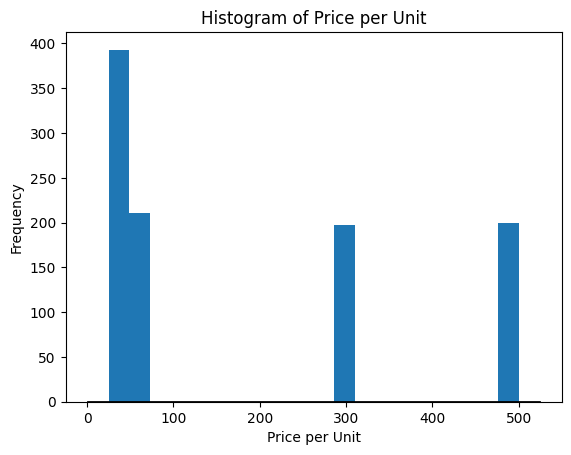

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.hist(data['Price per Unit'], bins=20)
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Unit')

# Calculate the mean and standard deviation of the column
mean = np.mean(data['Price per Unit'])
std = np.std(data['Price per Unit'])

# Calculate the theoretical normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plot the theoretical normal distribution on top of the histogram
plt.plot(x, p, 'k', linewidth=2)
plt.show()

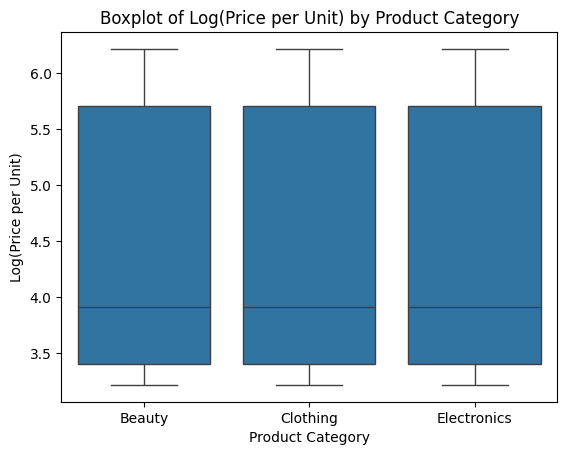

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=np.log(data['Price per Unit']), x=data['Product Category'])
plt.title('Boxplot of Log(Price per Unit) by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Log(Price per Unit)')
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Create an instance of KBinsDiscretizer with 5 bins, ordinal encoding, and uniform strategy
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Select the 'Price per Unit' column from the dataframe
X = data[['Price per Unit']]

# Fit the KBinsDiscretizer to the 'Price per Unit' column and transform it into binned data
X_binned = enc.fit_transform(X)

# Print the original data, bin edges, and binned data
print('Original Data:')
print(X.head(20))
print('\nBin edges:')
print(enc.bin_edges_)
print('\nBinned Data:')
print(X_binned[0:20, :])

Original Data:
    Price per Unit
0               50
1              500
2               30
3              500
4               50
5               30
6               25
7               25
8              300
9               50
10              50
11              25
12             500
13              30
14             500
15             500
16              25
17              25
18              25
19             300

Bin edges:
[array([ 25., 120., 215., 310., 405., 500.])]

Binned Data:
[[0.]
 [4.]
 [0.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [0.]
 [0.]
 [4.]
 [0.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [2.]]
